In [63]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
ccf_structures = pd.read_csv('/data/allen_mouse_ccf/annotation/adult_mouse_ccf_structures.csv')

In [18]:
def get_soma_loc(file_path):

    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
    except IOError as e:
        print(f"Error opening file: {e}")
        return None
    
    neuron_data = data['neuron'] if 'neuron' in data else data['neurons'][0]
    return(neuron_data['soma']['allenId'])

In [54]:
df = pd.DataFrame(columns=('cell_id','soma_id','soma_acronym','cre', 'filename'))


for folder in os.listdir(file_folders):
    if folder!="mouselight":
        for f in os.listdir(os.path.join(file_folders, folder)):
            subject_file = os.path.join(file_folders, folder, "subject.json")
            with open(subject_file, 'r') as file:
                data = json.load(file) 
            cre = data['genotype']
            if f=="Complete_annotated":
                for r in os.listdir(os.path.join(file_folders, folder, f)):
                    json_file = os.path.join(file_folders, folder, f, r)
                    soma_loc = get_soma_loc(json_file)
                    soma_acronym = ccf_structures[ccf_structures.id==soma_loc].acronym.values[0]
                    df.loc[len(df.index)] = [r,soma_loc, soma_acronym, cre, json_file] 
            else:
                continue
    else:
        for f in os.listdir(os.path.join(file_folders, folder)):
            json_file = os.path.join(file_folders, folder, f)
            soma_loc = get_soma_loc(json_file)
            try:
                soma_acronym = ccf_structures[ccf_structures.id==soma_loc].acronym.values[0]
            except Exception as e:
                print(f"Error loading {os.path.basename(json_file)}: {e}")
                soma_acronym = None
            df.loc[len(df.index)] = [f,soma_loc, soma_acronym, "n/a", json_file]

Error loading AA0952.json: index 0 is out of bounds for axis 0 with size 0
Error loading AA0964.json: index 0 is out of bounds for axis 0 with size 0
Error loading AA0968.json: index 0 is out of bounds for axis 0 with size 0
Error loading AA0977.json: index 0 is out of bounds for axis 0 with size 0
Error loading AA1355.json: index 0 is out of bounds for axis 0 with size 0
Error loading AA1363.json: index 0 is out of bounds for axis 0 with size 0
Error loading AA1456.json: index 0 is out of bounds for axis 0 with size 0
Error loading AA1463.json: index 0 is out of bounds for axis 0 with size 0


In [55]:
df.to_csv('../results/reconstructed_neurons.csv')

In [57]:
df[df.soma_acronym=='MOs5']

,cell_id,soma_id,soma_acronym,cre,filename
111,AA0010.json,767,MOs5,n/a,../data/neuron_tracings/mouselight/AA0010.json
112,AA0011.json,767,MOs5,n/a,../data/neuron_tracings/mouselight/AA0011.json
137,AA0036.json,767,MOs5,n/a,../data/neuron_tracings/mouselight/AA0036.json
138,AA0037.json,767,MOs5,n/a,../data/neuron_tracings/mouselight/AA0037.json
165,AA0064.json,767,MOs5,n/a,../data/neuron_tracings/mouselight/AA0064.json
...,...,...,...,...,...
1638,AA1537.json,767,MOs5,n/a,../data/neuron_tracings/mouselight/AA1537.json
1641,AA1540.json,767,MOs5,n/a,../data/neuron_tracings/mouselight/AA1540.json
1642,AA1541.json,767,MOs5,n/a,../data/neuron_tracings/mouselight/AA1541.json
1644,AA1543.json,767,MOs5,n/a,../data/neuron_tracings/mouselight/AA1543.json


In [56]:
for cre in df.cre.unique():
    print(cre, len(df[df.cre==cre]))

Slc17a6-IRES-Cre/wt 26
Dbh-Cre-KI/wt; Ai166(TIT2L-MORF-ICL-tTA2)/wt 13
Gal-Cre_KI87/wt 42
Cart-IRES2-Cre-neo/wt 21
n/a 1549


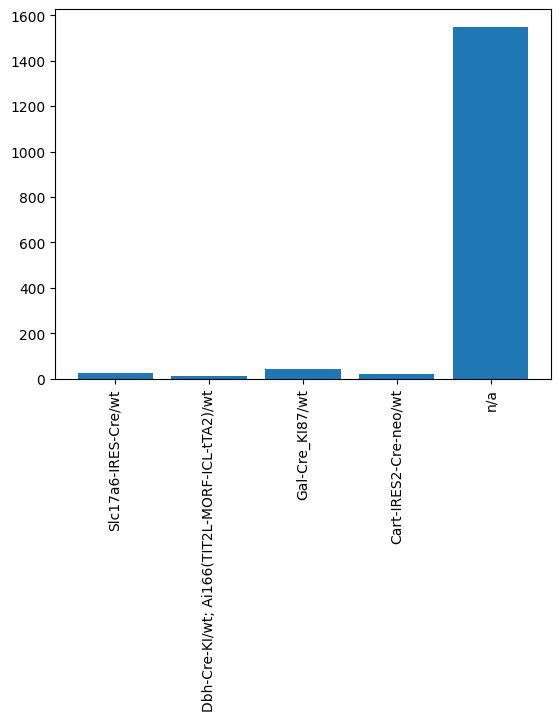

In [73]:
cres = []
cre_nums = []
for cre in df.cre.unique():
    cres.append(cre)
    cre_nums.append(len(df[df.cre==cre]))

plt.bar(range(5), cre_nums)
plt.xticks(range(5), cres, rotation=90);

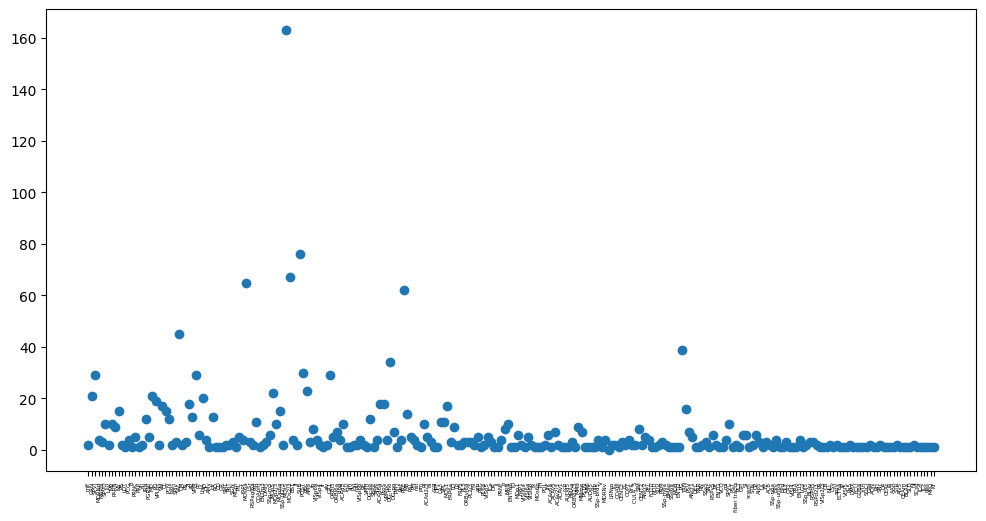

In [78]:
regions = []
region_num = []
for ac in df.soma_acronym.unique():
    regions.append(ac)
    region_num.append(len(df[df.soma_acronym==ac]))

plt.figure(figsize=(12,6))
plt.plot(range(len(regions)), region_num, 'o')
plt.xticks(range(len(regions)), regions, rotation=90, fontsize=4);